In [37]:
import pandas as pd
import requests
from io import StringIO

url = 'https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/서울특별시 코로나19.csv'
response = requests.get(url)
df = pd.read_csv(StringIO(response.text))[['날짜', '종로구']]
df

,날짜,종로구
0,2022-03-30,37261
1,2022-03-29,36216
2,2022-03-28,35276
3,2022-03-27,34879
4,2022-03-26,34061
...,...,...
780,2020-02-09,0
781,2020-02-08,0
782,2020-02-07,0
783,2020-02-06,3


#### 1. 전처리 : 시계열은 시간에 대한 정보가 중요하기 때문에, 단순히 행과 열로 되어있는 pandas를 시계열적인 의미를 주기 위해 전처리가 필요합니다.

- 먼저 날짜를 datetimeIndex 객체로 변환합니다.

In [38]:
df['날짜'] = pd.to_datetime(df['날짜'], format='%Y-%m-%d')
df = df.set_index('날짜')
df

,종로구
날짜,
2022-03-30,37261
2022-03-29,36216
2022-03-28,35276
2022-03-27,34879
2022-03-26,34061
...,...
2020-02-09,0
2020-02-08,0
2020-02-07,0


#### 날짜가 오름차순이 되도록 정렬을 꼭 해줍니다. 위의 데이터는 오름차순으로 되어있지 않습니다.

In [39]:
df = df.sort_index()
df

,종로구
날짜,
2020-02-05,3
2020-02-06,3
2020-02-07,0
2020-02-08,0
2020-02-09,0
...,...
2022-03-26,34061
2022-03-27,34879
2022-03-28,35276


날짜에서 정보를 뽑아낼 수 있습니다.

In [40]:
# 년, 월, 요일(숫자), 요일(텍스트)
df.index.year, df.index.month, df.index.weekday, df.index.day_name()

(Int64Index([2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
             ...
             2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
            dtype='int64', name='날짜', length=785),
 Int64Index([2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
             ...
             3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
            dtype='int64', name='날짜', length=785),
 Int64Index([2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
             ...
             0, 1, 2, 3, 4, 5, 6, 0, 1, 2],
            dtype='int64', name='날짜', length=785),
 Index(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
        'Tuesday', 'Wednesday', 'Thursday', 'Friday',
        ...
        'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
        'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
       dtype='object', name='날짜', length=785))

p.s.) 단순한 timestamp에서 날짜로 변경하려면 다음 코드를 참고해주세요

In [24]:
from datetime import datetime

timestamp = 2551780740
timestamp = datetime.fromtimestamp(timestamp)
print(timestamp)
timestamp.strftime('%Y-%m-%d')

2050-11-11 20:59:00


'2050-11-11'

날짜 범위를 생성하는 코드는 다음과 같습니다.

In [16]:
# 생성하는 날짜로부터 3기간, 일 기준
r = pd.date_range('2023-08-06', periods=3, freq='D') # A(년), M(월), D(일), Q(분기), W(주), T(분), S(초)
for d in r:
    print(d)

2023-08-06 00:00:00
2023-08-07 00:00:00
2023-08-08 00:00:00


날짜 데이터를 연산하여 원하는 날짜를 구할 수도 있습니다.

In [22]:
from datetime import timedelta

print(timestamp)
# year, weeks, days, hours, minutes
weeks2 = timedelta(weeks=2)
timestamp - weeks2

2050-11-11 20:59:00


datetime.datetime(2050, 10, 28, 20, 59)

분석에서 요구하는 데이터 기간은 월 단위 데이터인데 주어진 데이터는 일 단위일 수 있습니다. 이럴 경우 데이터를 변환해줍니다.

In [41]:
# 해당 기간의 대표 날짜(1개)의 데이터를 반환
print(df.resample(rule='Q').asfreq())

# 해당 기간의 데이터 합을 반환
print(df.resample(rule='Q').sum())

# 해당 기간의 데이터 평균을 반환
print(df.resample(rule='Q').mean())

               종로구
날짜                
2020-03-31    13.0
2020-06-30    22.0
2020-09-30    88.0
2020-12-31   393.0
2021-03-31   620.0
2021-06-30   821.0
2021-09-30  1646.0
2021-12-31  3973.0
2022-03-31     NaN
                종로구
날짜                 
2020-03-31      460
2020-06-30     1624
2020-09-30     4356
2020-12-31    13190
2021-03-31    47901
2021-06-30    65419
2021-09-30   105742
2021-12-31   237250
2022-03-31  1035254
                     종로구
날짜                      
2020-03-31      8.214286
2020-06-30     17.846154
2020-09-30     47.347826
2020-12-31    143.369565
2021-03-31    532.233333
2021-06-30    718.890110
2021-09-30   1149.369565
2021-12-31   2578.804348
2022-03-31  11632.067416


데이터에서 결측치가 존재할 가능성이 높습니다. 결측치를 처리하는 방법은 다음과 같습니다.
1. foward fill : 결측치 이전 데이터를 그대로 복사
2. backward fill : 결측치 다음 데이터를 그대로 복사
3. 이동 평균(moving average) : 과거의 여러 시간대를 이용하여 채워넣음
4. 보간법(Interpolation) : 과거 및 미래의 시간대를 이용하여 채워넣음

In [42]:
# forward fill
df_filled = df.fillna(method='ffill')

# backward fill
df_filled = df.fillna(method='bfill')

# 이동평균
df_filled = df.rolling(3, min_periods=1).mean() # 최소한 1개의 관측치가 있는 경우 3개 기간을 이용하여 평균내서 채우기

# 보간법 (보통은 선형 보간법(linear) 혹은 거리 기반(nearest) 쓰면 됩니다.)
df_filled = df.interpolate(method='linear')

#### 2. EDA

시계열에서 EDA할 것들은 많지 않지만 핵심은 이 데이터가 **정상성(stationary)** 를 만족하느냐 입니다.

- 정상성이란 **시간에 상관없이 일정한 성질** 을 의미합니다.

- 이 표현을 통계적으로 표현하면 **확률분포가 같아 기간에 따른 모평균 모분산이 동일하다** 라고 표현할 수 있습니다.

- 하지만 시계열 데이터가 평균 분산이 같은 데이터는 현실에 존재하지 않습니다.

- 따라서, 정상성은 강 정상성, 약 정상성으로 나누고 약 정상성을 만족하면 정상성을 만족한다고 생각합니다.

- 약 정상성을 띠는 시계열 데이터는 어느 시점(t)에 관측해도 확률 과정의 성질(E(Xt), Var(Xt))이 변하지 않습니다.

1. 즉, 정상성을 만족하면 선형 시계열 분석이 가능해집니다.
2. 정상성을 만족하지 않으면 비선형 시계열 or 머신러닝으로 분석해야 합니다.

##### eda 1: 기술 통계량 및 시각화를 진행합니다.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 785 entries, 2020-02-05 to 2022-03-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   종로구     785 non-null    int64
dtypes: int64(1)
memory usage: 32.3 KB


In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
종로구,785.0,1925.090446,4900.384096,0.0,37.0,561.0,1356.0,37261.0


<AxesSubplot:xlabel='날짜'>

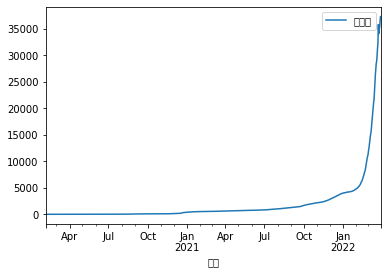

In [49]:
import warnings
warnings.filterwarnings('ignore')

df.plot()

대충 봐도 정상성을 확보한 데이터가 아니라는 것을 알 수 있습니다. 이를 통해 전처리를 해야 겠다는 판단을 합니다.

##### eda 2: seasonal_decompose를 통해서 크게 3가지를 확인해야 합니다.

<img width="664" alt="스크린샷 2023-08-06 오전 10 03 00" src="https://github.com/Ssunbell/ADP_study/assets/97590480/2f592aa5-8c50-4803-8699-a12c91651ad5">

1. observed : 관측치
2. 추세(Trend) : 일정하게 상승하는 그래프가 존재하면 추세가 존재한다는 것이고, 이는 차분을 통해서 해결할 수 있습니다.
3. 계절성(Seasonality) : 일정한 주기를 가지고 위아래로 왔다갔다 할 경우 계절성이 존재하는 것이고 이는 이동 평균법 등을 통해서 해결할 수 있습니다.
4. 잔차 : 분석에 사용하는 값. 이 잔차가 정상성을 확보하고 있는지를 파악해야 함.

위의 예시는 추세 및 계절성이 모두 존재합니다.

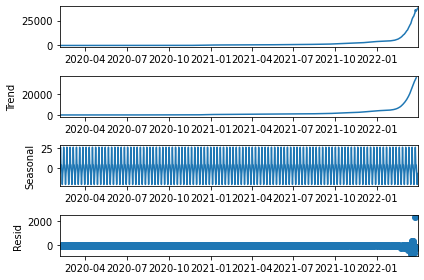

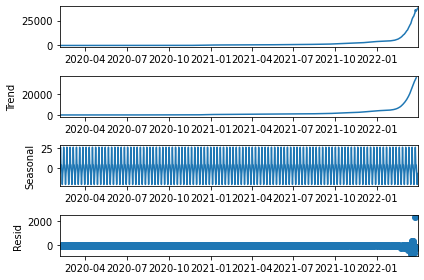

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 시계열 데이터 분해
#  'additive'나 'multiplicative' 중 하나를 선택합니다.
#  additive 모델은 계절성 성분과 추세가 더해져서 관측값을 구성한다고 가정하고,
#  multiplicative 모델은 계절성 성분과 추세가 곱해져서 관측값을 구성한다고 가정
result = seasonal_decompose(df, model='additive')

result.plot()

#### eda3 : 정상성 확보

해당 데이터는 추세가 존재하기 때문에 정상성이 확보되어 있지 않습니다.

또한, 비정상성이라는 말은 다음 두가지 말로 표현할 수 있습니다.

- random walk한다는 말과 동일합니다.
- 단위근($\phi$ ; unit root)이 1 이상이라는 말과 동일합니다.

random walk는 

$$y_{t} = \phi y_{t-1} + \epsilon_{t}$$

에서 $\phi >= 1$을 의미합니다.

즉, 시간이 지날수록 어떤 평균 값으로 수렴하는 것이 아닌 발산하는 그래프를 의미합니다.

##### 이러한 정상성이 확보되어 있는지 확인하는 방법이 단위근 검정입니다. 단위근 검정은 adf test (augmented dfuller test)를 진행합니다.

정상성이 확보되어있지 않다면 $\phi < 1$이 되도록 전처리를 해줍니다.

In [59]:
from statsmodels.tsa.stattools import adfuller

# H0 : 단위근이 있다.
# H1 : 단위근이 없다.
result = adfuller(df['종로구'])

# 단위근 존재
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 1.829849
p-value: 0.998406


ADF Statistic: -2.156076
p-value: 0.222572


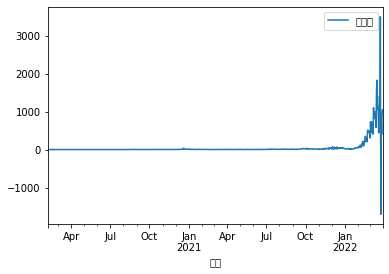

In [62]:
df_diff = df.diff().dropna()
df_diff.plot()

result = adfuller(df_diff['종로구'])

# 단위근 존재
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

In [111]:
df.shift(1)

,종로구
날짜,
2020-02-05,NaN
2020-02-06,3.0
2020-02-07,3.0
2020-02-08,0.0
2020-02-09,0.0
...,...
2022-03-26,35766.0
2022-03-27,34061.0
2022-03-28,34879.0


위의 데이터에서 차분을 해서 adf 검정을 했는데도 정상성이 만족되지 않았습니다.

이 경우 차분 전에 log, box-cox, yeo_johnson 변환 등을 이용할 수 있습니다.

log 변환은 데이터 안에 0이 존재하면 -inf로 변환되므로 해당 데이터에서는 적용하기 힘듭니다.

box-cox 변환은 양수 데이터에서만 가능하므로 0이 포함되어 있으면 변환이 안됩니다.

In [76]:
df

### log 변환
# df_log = np.log(df)
# df_ldiff = df_log.diff().dropna()
# df_ldiff.plot()

# result = adfuller(df_ldiff['종로구'])

# # 단위근 존재
# print('ADF Statistic: %f' % result[0])
# print('p-value: %f' % result[1])

,종로구
날짜,
2020-02-05,3
2020-02-06,3
2020-02-07,0
2020-02-08,0
2020-02-09,0
...,...
2022-03-26,34061
2022-03-27,34879
2022-03-28,35276


In [93]:
from sklearn.preprocessing import PowerTransformer

# box_cox = PowerTransformer(method='box-cox')
# df_box = box_cox.fit_transform(df)
# df_box

yeo_johnson_transformer = PowerTransformer(method='yeo-johnson', standardize=False)
df_yeo = df.copy()
df_yeo['종로구'] = yeo_johnson_transformer.fit_transform(df)
df_yeo

,종로구
날짜,
2020-02-05,1.433329
2020-02-06,1.433329
2020-02-07,0.000000
2020-02-08,0.000000
2020-02-09,0.000000
...,...
2022-03-26,13.536983
2022-03-27,13.576115
2022-03-28,13.594793


784


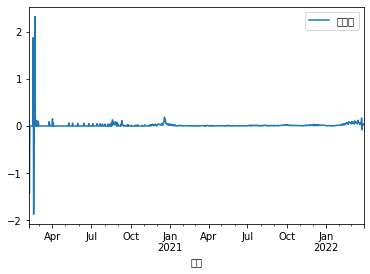

In [99]:
df_yeo_diff = df_yeo.diff().dropna()

df_yeo_diff.plot()

print(len(df_yeo_diff))

In [98]:
result = adfuller(df_yeo_diff)

# 단위근 존재
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -6.858211
p-value: 0.000000


adf test를 시행한 결과 정상성이 확보된 것을 볼 수 있습니다.

#### 하지만 이것이 정확한 분석일까요??

위의 차분 그래프를 보면 분석자가 원하는 분석은 시계열을 통해 변화를 예측하는 것일 겁니다.

따라서 분석의 초점에 맞춰보면 2021년 이전 데이터는 굳이 필요하지 않을 수도 있습니다.

이 경우에 adf test를 만족하기 위해서는 분석 기간을 조정하여 adf test를 만족하게 하는 방법도 존재합니다.

,종로구
날짜,
2021-01-01,404
2021-01-02,414
2021-01-03,418
2021-01-04,422
2021-01-05,426
...,...
2022-03-26,34061
2022-03-27,34879
2022-03-28,35276


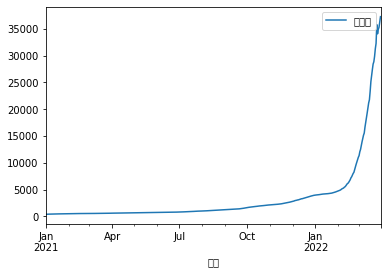

In [102]:
df_after_2022 = df[df.index > '2020-12-31']

df_after_2022.plot()

df_after_2022

In [103]:
from statsmodels.tsa.stattools import adfuller

# H0 : 단위근이 있다.
# H1 : 단위근이 없다.
result = adfuller(df_after_2022['종로구'])

# 단위근 존재
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 1.480728
p-value: 0.997452


ADF Statistic: -0.132288
p-value: 0.946126


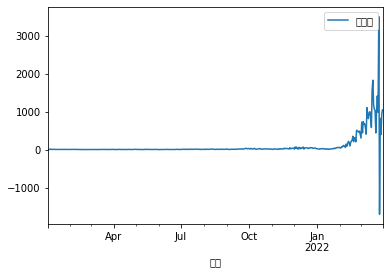

In [104]:
df_after_2022_diff = df_after_2022.diff().dropna()
df_after_2022_diff.plot()

result = adfuller(df_after_2022_diff['종로구'])

# 단위근 존재
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.691329
p-value: 0.004237


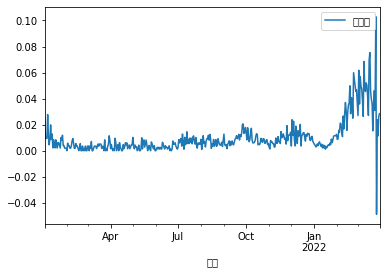

In [105]:
import numpy as np

## log 변환
df_log = np.log(df_after_2022)
df_ldiff = df_log.diff().dropna()
df_ldiff.plot()

result = adfuller(df_ldiff['종로구'])

# 단위근 존재
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

##### 특히, log 차분(변화율) 분석에서는 scale이 작아도 변화율을 급격히 변하기 때문에 기간을 설정해서 분석하는 것이 중요합니다.

#### eda 4: 자기상관성 확인

자기상관(다중공산성과 비슷한 문제)이 발생하는 원인은 다음 4가지 입니다.

- Inertia(관성) : 데이터에 대한 관성이 존재하여 전기 데이터가 현재, 다음기 데이터와 비슷한 양상을 보이는 것을 말합니다.
- specification error : 중요 변수를 넣지 않은 경우나 함수 형태가 틀린 경우에 발생합니다.
- manipulate data : 데이터처리를 잘못한 경우

$$cov(e_{t}, e_{t-1}) \ne 0$$

$$u_{t} = \phi u{t-1} + e_{t}, |\phi| < 1$$

따라서, $|\phi| = 0$으로 만들어주는 것이 자기 상관없을 없애는 작업입니다.

이러한 자기상관성이 존재하는 것을 확인하기 위한 쉬운 방법은 더빈 왓슨 검정입니다.

더빈 왓슨 방식은 검정 조건이 있어서 브로슈 갓프리 검정을 추가로 진행해줘야 합니다.

더빈 왓슨 검정은 0에서 4 사이의 값을 가집니다. 값이 2에 가까울수록 오차항들 사이에 자기상관이 없다는 것을 나타내며, 2보다 크면 음의 자기상관을, 2보다 작으면 양의 자기상관을 나타냅니다. 

In [106]:
from statsmodels.stats.stattools import durbin_watson

# 'residuals'는 회귀 모델의 잔차입니다.
dw_result = durbin_watson(df_ldiff)
dw_result

array([0.44171949])

In [107]:
import scipy.stats as stats

W, p = stats.shapiro(df_ldiff)

print(f'W: {W}, p-value: {p}')

if p > 0.05:
    print('Data follows normal distribution')
else:
    print('Data does not follow normal distribution')

W: 0.6668741106987, p-value: 7.786778515666181e-29
Data does not follow normal distribution


In [117]:
df_ols = df_ldiff.copy()

df_ols = df_ols.rename({'종로구':'jongro'}, axis=1)
df_ols['jongro_lag'] = df_ols['jongro'].shift(1)

df_ols = df_ols.dropna()
df_ols

,jongro,jongro_lag
날짜,,
2021-01-03,0.009615,0.024451
2021-01-04,0.009524,0.009615
2021-01-05,0.009434,0.009524
2021-01-06,0.027780,0.009434
2021-01-07,0.011351,0.027780
...,...,...
2022-03-26,-0.048845,0.102953
2022-03-27,0.023732,-0.048845
2022-03-28,0.011318,0.023732


이러한 자기상관성이 존재한다는 것을 확인했다면 이를 이분산이라고 가정하고 OLS 방식으로 해결해줍니다.

대표적인 해결 방법은 Newey-West 표준 오차를 이용한 분산 조정 방식입니다.

In [119]:
import statsmodels.formula.api as smf

model = smf.ols(formula='jongro ~ jongro_lag', data=df_ols).fit()

# Newey-West 방법을 적용하여 표준 오차를 계산합니다.
newey_west_se = model.get_robustcov_results(cov_type='HAC', maxlags=1).bse

print(newey_west_se)

[0.00148832 0.16393503]
